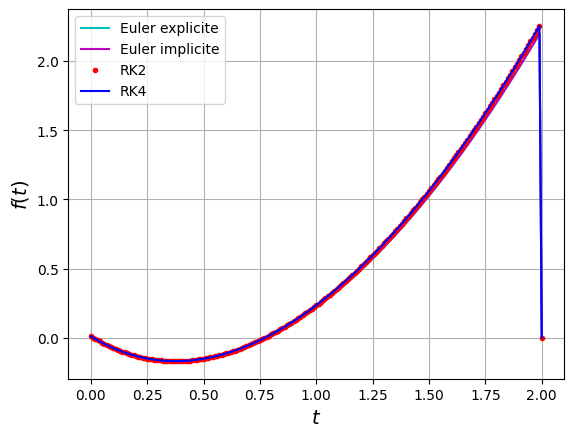

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# fonction f définie par y'=f(t,y)
def f(t, y):
    return (2*t*y+3*t-1)/(1+t**2)

# initialisation
t_min = 0
t_max = 2
h = 0.01  # pas de calcul
t = np.arange(t_min, t_max + h, h)
y = np.zeros((4, len(t)))   # matrice de 4 lignes (une ligne par méthode)
y[:, 0] = 1  # condition initiale (la même pour toute les méthodes)
beta = 0.5



for k in range(len(t)-1):

    # Euler explicite
    y[0][k]=y[0][k-1]+h*f(t[k-1],y[0][k-1])

    # Euler implicite
    y[1][k]=( (1+t[k-1]**2)*y[0][k-1] + h* (3*t[k]-1) )/(1+t[k-1]**2-2*h*t[k-1])

    # Runge-Kutta d'ordre 2 (3 lignes de code)
    k1=f(t[k-1],y[2][k-1])
    k2=f(t[k-1]+h/(2*beta),y[2][k-1]+(h*k1)/(2*beta))
    y[2][k]=y[2][k-1]+h*((1-beta)*k1+beta*k2)
    
    # Runge-Kutta d'ordre 4 (5 lignes de code)
    k1=f(t[k-1],y[2][k-1])
    k2=f(t[k-1]+h/2,y[2][k-1]+(h*k1)/2)
    k3=f(t[k-1]+h/2,y[2][k-1]+(h*k2)/2)
    k4=f(t[k-1]+h,y[2][k-1]+(h*k3))
    y[3][k]=y[3][k-1]+(h/6)*(k1+2*k2+2*k3+k4)


# affichage
plt.figure(1)
plt.plot(t, y[0, :], 'c', label='Euler explicite')
plt.plot(t, y[1, :], 'm', label='Euler implicite')
plt.plot(t, y[2, :], 'r.', label='RK2')
plt.plot(t, y[3, :], 'b', label='RK4')

lg = plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$f(t)$', fontsize=14)
plt.grid(True)
